<a href="https://colab.research.google.com/github/arnaldourbina/desafio_telecom_x_2/blob/main/Desafio_TelecomX2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Extracción del Archivo Tratado en desafio anterior

In [84]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
df_telecom2 = pd.read_csv('/content/data_telecom_x2.csv')
df_telecom2

,id,cancelacion,genero,mayor_de_65,pareja,dependientes,meses_de_contrato,servicio_telefonico,lineas_multiples,servicio_internet,...,soporte_tecnico,servicio_tv,servicio_peliculas,tipo_contrato,facturas_electronicas,metodo_pago,total_pagos_mensuales,ingreso_total_cliente,cuentas_diarias,tiempo_de_contrato
0,0002-ORFBO,0,female,0,1,1,9.0,1,0,dsl,...,1,1,0,one year,1,mailed check,65.60,593.30,2.186667,9.044207
1,0003-MKNFE,0,male,0,0,0,9.0,1,1,dsl,...,0,0,1,month-to-month,0,mailed check,59.90,542.40,1.996667,9.055092
2,0004-TLHLJ,1,male,0,0,0,4.0,1,0,fiber optic,...,0,0,0,month-to-month,1,electronic check,73.90,280.85,2.463333,3.800406
3,0011-IGKFF,1,male,1,1,0,13.0,1,0,fiber optic,...,0,1,1,month-to-month,1,electronic check,98.00,1237.85,3.266667,12.631122
4,0013-EXCHZ,1,female,1,1,0,3.0,1,0,fiber optic,...,1,1,0,month-to-month,1,mailed check,83.90,267.40,2.796667,3.187128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,0,female,0,0,0,13.0,1,0,dsl,...,1,0,0,one year,0,mailed check,55.15,742.90,1.838333,13.470535
7039,9992-RRAMN,1,male,0,1,0,22.0,1,1,fiber optic,...,0,0,1,month-to-month,1,electronic check,85.10,1873.70,2.836667,22.017626
7040,9992-UJOEL,0,male,0,0,0,2.0,1,0,dsl,...,0,0,0,month-to-month,1,mailed check,50.30,92.75,1.676667,1.843936
7041,9993-LHIEB,0,male,0,1,1,67.0,1,0,dsl,...,1,0,1,two year,0,mailed check,67.85,4627.65,2.261667,68.204127


# Verificación de la Proporción de Cancelación (Churn)

Calcula la proporción de clientes que cancelaron en relación con los que permanecieron activos. Evalúa si existe un desbalance entre las clases, ya que esto puede impactar en los modelos predictivos y en el análisis de los resultados.

In [86]:
proporcion_canc = df_telecom2['cancelacion'].value_counts(normalize=True)*100
proporcion_canc

,proportion
cancelacion,
0,73.463013
1,26.536987


# Eliminación de Columnas Irrelevantes

   ### Preparar los datos para el modelado (tratamiento, codificación, normalización).


In [87]:
df_telecom2 = df_telecom2.drop(['id',], axis=1)
df_telecom2 = df_telecom2.drop(['meses_de_contrato'], axis=1)

In [88]:
df_telecom2 = df_telecom2.drop(['cuentas_diarias'], axis=1)

In [89]:
df_telecom2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cancelacion            7043 non-null   int64  
 1   genero                 7043 non-null   object 
 2   mayor_de_65            7043 non-null   int64  
 3   pareja                 7043 non-null   int64  
 4   dependientes           7043 non-null   int64  
 5   servicio_telefonico    7043 non-null   int64  
 6   lineas_multiples       7043 non-null   int64  
 7   servicio_internet      7043 non-null   object 
 8   seguridad_en_linea     7043 non-null   int64  
 9   Soporte_en_linea       7043 non-null   int64  
 10  protecc_disp           7043 non-null   int64  
 11  soporte_tecnico        7043 non-null   int64  
 12  servicio_tv            7043 non-null   int64  
 13  servicio_peliculas     7043 non-null   int64  
 14  tipo_contrato          7043 non-null   object 
 15  fact

In [90]:
#columnas_categoricas = df_telecom2.select_dtypes(include=['object']).columns
#columnas_categoricas

In [91]:
#df_dummies = pd.get_dummies(df_telecom2,columns=columnas_categoricas, drop_first=True)
#df_dummies.head()

##    Realizar análisis de correlación y selección de variables.


 # Correlación y Selección de Variables

In [92]:
df_telecom2_num = df_telecom2


In [111]:

df_telecom2_num['genero']= df_telecom2_num['genero'].replace({'male':0,'female':1})

/tmp/ipython-input-3088600518.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_telecom2_num['genero']= df_telecom2_num['genero'].replace({'male':0,'female':1})


In [116]:
df_telecom2_num['servicio_internet']= df_telecom2_num['servicio_internet'].replace({'fiber optic':0,'dsl':1,'no':2})

In [119]:

df_telecom2_num['tipo_contrato']= df_telecom2_num['tipo_contrato'].replace({'month-to-month':0,'two year':1,'one year':2})

/tmp/ipython-input-1182740931.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_telecom2_num['tipo_contrato']= df_telecom2_num['tipo_contrato'].replace({'month-to-month':0,'two year':1,'one year':2})


In [110]:
df_telecom2_num['metodo_pago']= df_telecom2_num['metodo_pago'].replace({'electronic check':0,'mailed check':1,'bank transfer (automatic)':2,'credit card (automatic)':3})


In [120]:
corr = df_telecom2_num.corr()

In [121]:
corr['cancelacion']

,cancelacion
cancelacion,1.000000
genero,0.008612
mayor_de_65,0.150889
pareja,-0.150448
dependientes,-0.164221
servicio_telefonico,0.011942
lineas_multiples,0.040102
servicio_internet,-0.316846
seguridad_en_linea,-0.171226
Soporte_en_linea,-0.082255


### Seleccion de Variables

In [21]:
X = df_telecom2.drop('cancelacion', axis=1)
y = df_telecom2.cancelacion

In [22]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder


### Transformando variables explicativas

In [23]:
columnas = X.columns

In [24]:
met_one_hot = make_column_transformer((OneHotEncoder(drop='if_binary'),
                                      ['genero','servicio_internet','tipo_contrato','metodo_pago']),
                                      remainder='passthrough',
                                      sparse_threshold=0,
                                      force_int_remainder_cols=False)

In [25]:
X = met_one_hot.fit_transform(X)


In [26]:
met_one_hot.get_feature_names_out(columnas)

array(['onehotencoder__genero_male',
       'onehotencoder__servicio_internet_dsl',
       'onehotencoder__servicio_internet_fiber optic',
       'onehotencoder__servicio_internet_no',
       'onehotencoder__tipo_contrato_month-to-month',
       'onehotencoder__tipo_contrato_one year',
       'onehotencoder__tipo_contrato_two year',
       'onehotencoder__metodo_pago_bank transfer (automatic)',
       'onehotencoder__metodo_pago_credit card (automatic)',
       'onehotencoder__metodo_pago_electronic check',
       'onehotencoder__metodo_pago_mailed check',
       'remainder__mayor_de_65', 'remainder__pareja',
       'remainder__dependientes', 'remainder__servicio_telefonico',
       'remainder__lineas_multiples', 'remainder__seguridad_en_linea',
       'remainder__Soporte_en_linea', 'remainder__protecc_disp',
       'remainder__soporte_tecnico', 'remainder__servicio_tv',
       'remainder__servicio_peliculas',
       'remainder__facturas_electronicas',
       'remainder__total_pagos_me

In [27]:
pd.DataFrame(X, columns=met_one_hot.get_feature_names_out(columnas))


,onehotencoder__genero_male,onehotencoder__servicio_internet_dsl,onehotencoder__servicio_internet_fiber optic,onehotencoder__servicio_internet_no,onehotencoder__tipo_contrato_month-to-month,onehotencoder__tipo_contrato_one year,onehotencoder__tipo_contrato_two year,onehotencoder__metodo_pago_bank transfer (automatic),onehotencoder__metodo_pago_credit card (automatic),onehotencoder__metodo_pago_electronic check,...,remainder__seguridad_en_linea,remainder__Soporte_en_linea,remainder__protecc_disp,remainder__soporte_tecnico,remainder__servicio_tv,remainder__servicio_peliculas,remainder__facturas_electronicas,remainder__total_pagos_mensuales,remainder__ingreso_total_cliente,remainder__tiempo_de_contrato
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,1.0,65.60,593.30,9.044207
1,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,59.90,542.40,9.055092
2,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,73.90,280.85,3.800406
3,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,1.0,0.0,1.0,1.0,1.0,98.00,1237.85,12.631122
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,83.90,267.40,3.187128
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,55.15,742.90,13.470535
7039,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,85.10,1873.70,22.017626
7040,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,50.30,92.75,1.843936
7041,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,67.85,4627.65,68.204127


### Transformando variable respuesta

In [28]:
y = y.to_numpy(y)


In [29]:
y

array([0, 0, 1, ..., 0, 0, 0])

##  Entrenar dos o más modelos de clasificación.

### creando datos de entrenamiento y prueba

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Balanceo de datos con SMOTE

In [32]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

### Creando modelo de referencia - Baseline

In [33]:
from sklearn.dummy import DummyClassifier

In [34]:
dummy = DummyClassifier()
dummy.fit(X_train, y_train)

dummy.score(X_test, y_test)

0.73450070989115

In [35]:
dummy = DummyClassifier()
dummy.fit(X_train_smote, y_train_smote)

dummy.score(X_test, y_test)

0.73450070989115

### Creando modelo de arbol de decisión

In [36]:
valores_columnas = met_one_hot.get_feature_names_out()

In [37]:
from sklearn.tree import DecisionTreeClassifier

In [38]:
modelo_arbol = DecisionTreeClassifier(random_state=5)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(random_state=5)

In [39]:
modelo_arbol.score(X_test, y_test)

0.7250354945575012

In [40]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

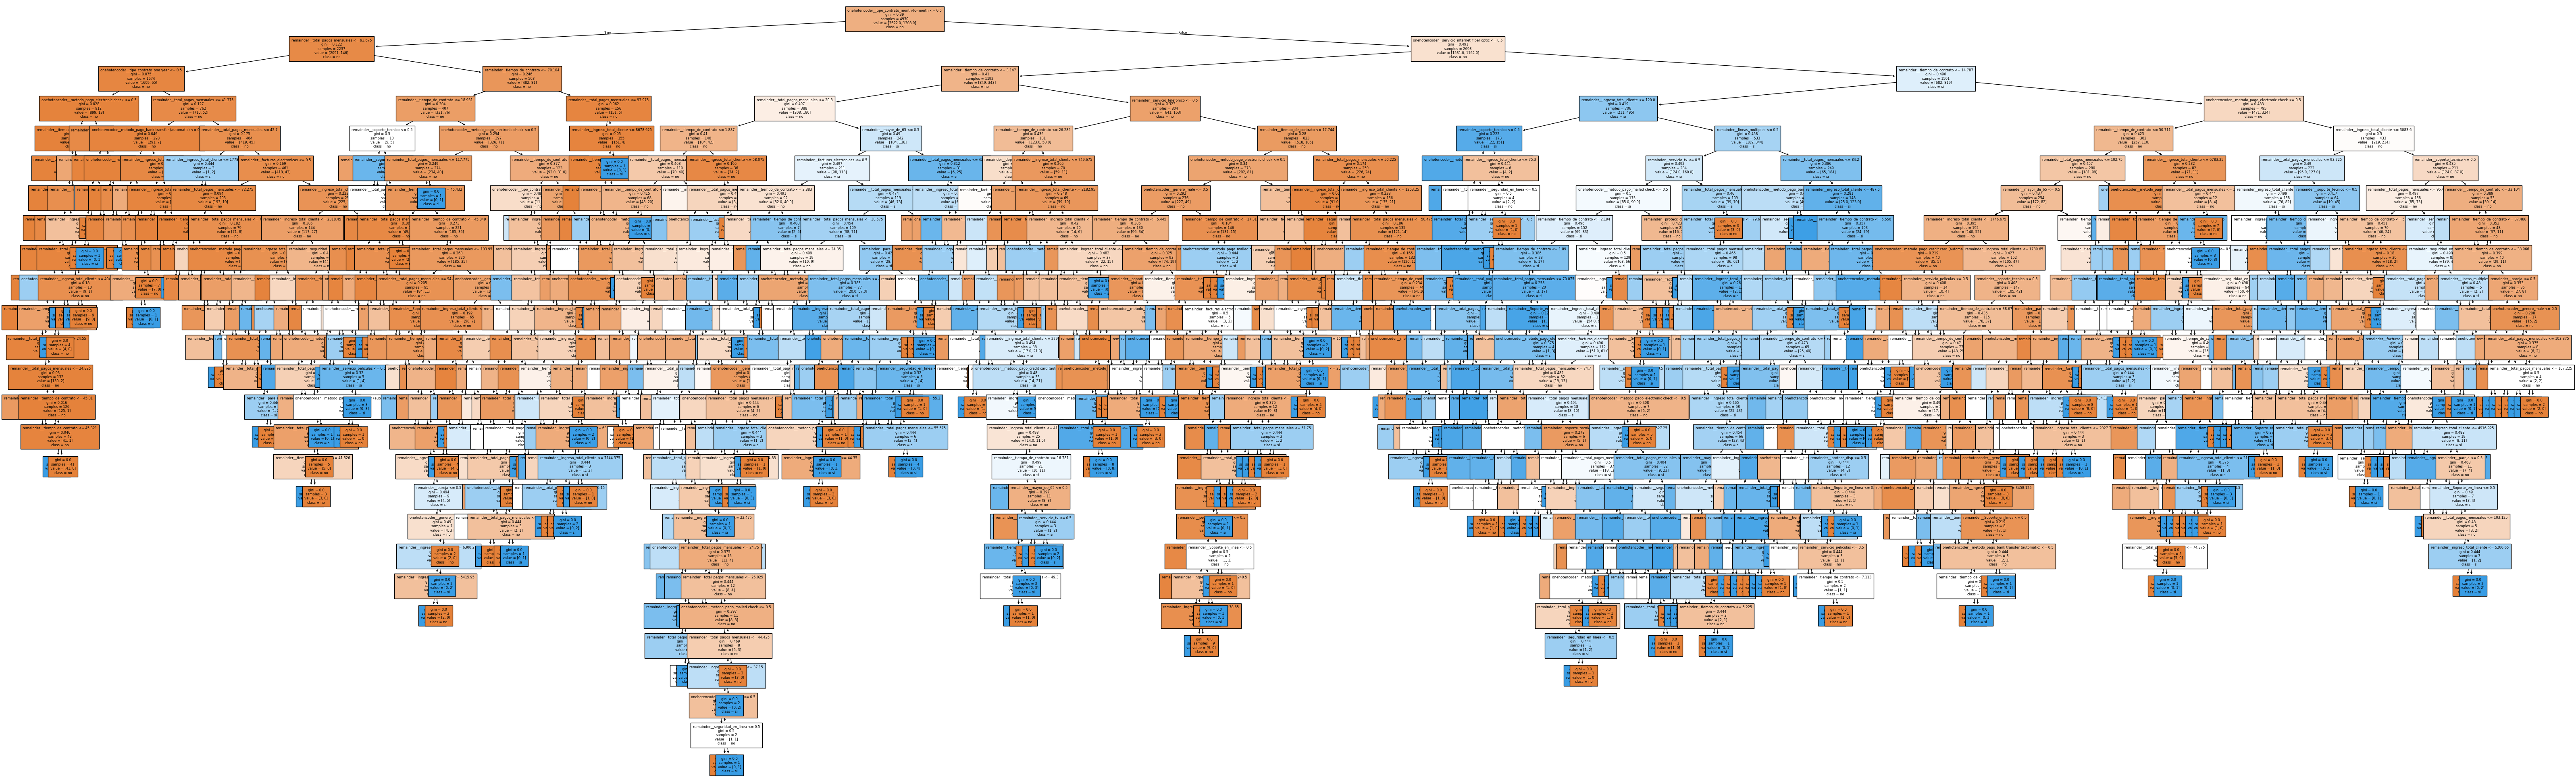

In [41]:
plt.figure(figsize=(80,25))
plot_tree(modelo_arbol,filled=True, class_names=['no','si'],fontsize=6, feature_names=valores_columnas.tolist())
plt.show()

In [42]:
modelo_arbol.score(X_train, y_train)

0.9977687626774848

In [43]:
modelo_arbol = DecisionTreeClassifier(random_state=5, max_depth=3)
modelo_arbol.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=5)

In [44]:
modelo_arbol.score(X_test, y_test)

0.7870326549929011

### Modelo KNN

#### Normalizando datos para usar en modelo KNN

In [45]:
from sklearn.preprocessing import MinMaxScaler

In [46]:
normalizacion = MinMaxScaler()
X_train_norm = normalizacion.fit_transform(X_train_smote)
X_test_norm = normalizacion.transform(X_test)

In [47]:
pd.DataFrame(X_train_smote)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.000000,0.00000,1.00000,0.0,1.000000,0.000000,0.00000,0.000000,0.0,1.000000,...,0.0,0.000000,1.000000,0.00000,0.000000,0.00000,0.000000,76.450000,1117.550000,14.618051
1,1.000000,1.00000,0.00000,0.0,0.000000,1.000000,0.00000,0.000000,0.0,0.000000,...,0.0,0.000000,1.000000,0.00000,1.000000,1.00000,1.000000,70.000000,347.400000,4.962857
2,1.000000,0.00000,1.00000,0.0,1.000000,0.000000,0.00000,0.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.00000,0.000000,0.00000,1.000000,75.200000,2576.200000,34.257979
3,1.000000,1.00000,0.00000,0.0,0.000000,0.000000,1.00000,0.000000,0.0,1.000000,...,1.0,1.000000,1.000000,0.00000,1.000000,1.00000,1.000000,86.100000,4890.500000,56.800232
4,0.000000,1.00000,0.00000,0.0,1.000000,0.000000,0.00000,0.000000,0.0,0.000000,...,0.0,1.000000,0.000000,0.00000,0.000000,0.00000,1.000000,49.600000,114.700000,2.312500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7239,0.000000,0.00000,1.00000,0.0,1.000000,0.000000,0.00000,0.000000,0.0,1.000000,...,0.0,0.090825,0.090825,0.00000,1.000000,1.00000,1.000000,96.940175,1529.399814,15.786363
7240,1.000000,0.00000,1.00000,0.0,1.000000,0.000000,0.00000,0.000000,0.0,1.000000,...,0.0,0.000000,0.000000,0.00000,0.000000,1.00000,0.313878,85.205837,2655.120623,31.161166
7241,0.308944,0.00000,1.00000,0.0,0.691056,0.308944,0.00000,0.691056,0.0,0.308944,...,0.0,0.691056,0.691056,0.00000,0.691056,1.00000,0.691056,100.649570,5109.977196,51.314599
7242,1.000000,0.00000,1.00000,0.0,1.000000,0.000000,0.00000,0.000000,0.0,1.000000,...,0.0,0.728367,0.271633,0.00000,1.000000,0.00000,1.000000,88.335817,1771.902064,20.059013


In [48]:
from sklearn.neighbors import KNeighborsClassifier

In [49]:
knn = KNeighborsClassifier()


In [50]:
knn.fit(X_train_norm, y_train_smote)

KNeighborsClassifier()

In [51]:
knn.score(X_test_norm, y_test)

0.6829152863227639

## Evaluar el rendimiento de los modelos con métricas.

    Interpretar los resultados, incluyendo la importancia de las variables.

    Crear una conclusión estratégica señalando los principales factores que influyen en la cancelación.

